In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm, geom, ttest_1samp, ttest_ind, ttest_rel, chi2, chisquare, chi2_contingency
from scipy.stats import levene, shapiro, f_oneway, kruskal, pearsonr, spearmanr, poisson, expon
from statsmodels.graphics.gofplots import qqplot

In [2]:
cu= pd.read_csv("/content/Customers.csv", encoding="unicode_escape")
pr= pd.read_csv("/content/Products.csv", encoding="unicode_escape")
sa= pd.read_csv("/content/Sales.csv", encoding="unicode_escape")

In [3]:
cu.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [4]:
sa.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [5]:
pr.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


## EDA AND DATA CLEANING

In [6]:
cu.shape

(15266, 10)

In [7]:
cu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


Data Pre-processing:

A. Customer Dataset
1. Birthday should be in timestamp format as we want "AGE" of customer as new Feature.
2. Customer table has 10 null values associated to the "State Code" column, but by checking the content separately we found code for the Napoli (Italy) is missing and so we assume this code as "NAP".
3. Almost 50-50 male and Female.
4. Distribution of customer is across 8 Countries and 3 Continents.
5. Current reference date assumed to be December 2020. It gives age vise bucket.
6. Droped Zip_Code column as it seems useless.

In [8]:
cu.isna().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [9]:
cu[cu["State Code"].isna()]

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,3/3/2000


In [10]:
cu[cu["State"]=="Napoli"]

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,3/3/2000


In [11]:
cu[cu["Country"]=="Italy"]

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5116,700308,Female,Nicoletta Angelo,Natile,RC,Reggio Calabria,89030,Italy,Europe,12/18/1946
5117,700309,Male,Filippo Trevisani,Pietrelcina,BN,Benevento,82020,Italy,Europe,10/1/1995
5118,700354,Female,Elga Sagese,Rettorgole,VI,Vicenza,36030,Italy,Europe,11/17/1957
5119,700619,Male,Flaviano Castiglione,Brazzolo,FE,Ferrara,44035,Italy,Europe,2/28/1945
5120,700909,Male,Davide Siciliani,Tamara,FE,Ferrara,44030,Italy,Europe,1/18/1943
...,...,...,...,...,...,...,...,...,...,...
5756,799323,Male,Domenico Fiorentino,Circello,BN,Benevento,82020,Italy,Europe,8/6/1946
5757,799366,Male,Berardo Onio,San Biagio In Padule,MO,Modena,41038,Italy,Europe,10/21/1944
5758,799620,Female,Ilda Ricci,Bagno Di Gavorrano,GR,Grosseto,58021,Italy,Europe,8/12/1936
5759,799689,Male,Francesco Sabbatini,Savoniero,MO,Modena,41046,Italy,Europe,3/25/1944


In [12]:
cu["State Code"].fillna("NAP", inplace= True)

In [13]:
cu.isna().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [14]:
cu["Gender"].value_counts()

Gender
Male      7748
Female    7518
Name: count, dtype: int64

In [15]:
cu["Country"].value_counts()

Country
United States     6828
United Kingdom    1944
Canada            1553
Germany           1473
Australia         1420
Netherlands        733
France             670
Italy              645
Name: count, dtype: int64

In [16]:
cu["Continent"].value_counts()

Continent
North America    8381
Europe           5465
Australia        1420
Name: count, dtype: int64

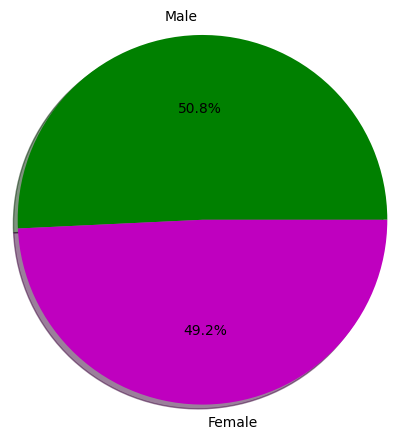

In [17]:
plt.figure(figsize=(15,5))
x = cu["Gender"].value_counts().values
y = cu["Gender"].value_counts().index
plt.pie(x, labels = y, center=(0, 0), radius=1.2, autopct='%1.1f%%', colors=["g","m"], shadow="True")
plt.show()

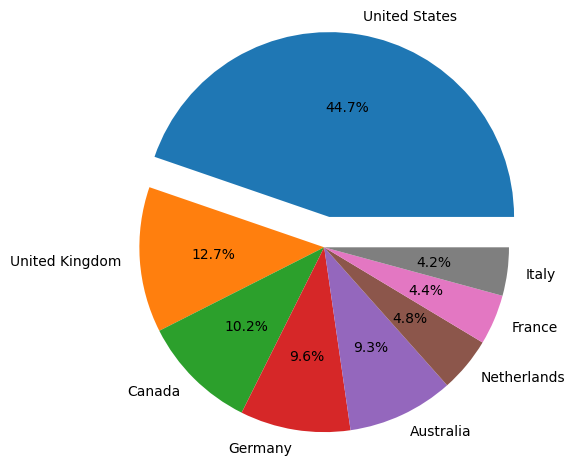

In [18]:
plt.figure(figsize=(15,5))
x = cu["Country"].value_counts().values
y = cu["Country"].value_counts().index
plt.pie(x, labels = y, center=(0, 0), radius=1.2, autopct='%1.1f%%', explode= [0.2,0,0,0,0,0,0,0])
plt.show()

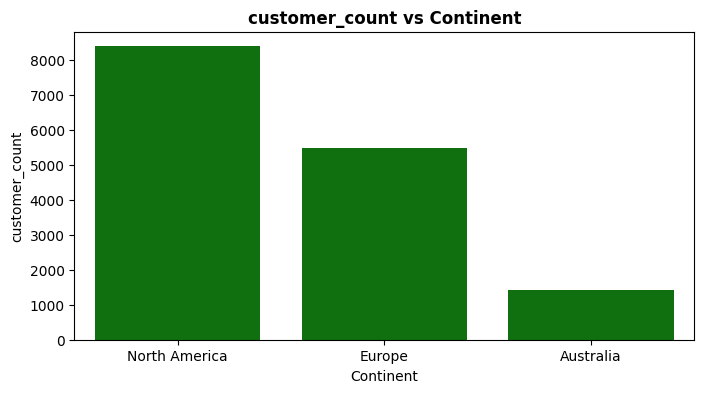

In [19]:
plt.figure(figsize=(8,4))
sns.barplot(x=cu['Continent'].value_counts().index, y=cu['Continent'].value_counts().values, color= "Green")
plt.xlabel('Continent')
plt.ylabel('customer_count')
plt.title('customer_count vs Continent', fontsize = 12, fontweight = 'bold')
plt.show()

In [20]:
cu["Birthday"] = pd.to_datetime(cu["Birthday"])

In [21]:
cu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State Code   15266 non-null  object        
 5   State        15266 non-null  object        
 6   Zip Code     15266 non-null  object        
 7   Country      15266 non-null  object        
 8   Continent    15266 non-null  object        
 9   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1.2+ MB


In [22]:
cu["Birthday"].min(), cu["Birthday"].max()

(Timestamp('1935-02-03 00:00:00'), Timestamp('2002-02-18 00:00:00'))

In [23]:
cu["Age"]= 2020 - cu["Birthday"].dt.year

In [24]:
cu= cu.drop(columns=["Zip Code"])

In [25]:
cu

,CustomerKey,Gender,Name,City,State Code,State,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,Australia,Australia,1939-07-03,81
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,Australia,Australia,1979-09-27,41
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,Australia,Australia,1947-05-26,73
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,Australia,Australia,1957-09-17,63
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,Australia,Australia,1965-11-19,55
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,United States,North America,1936-03-25,84
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,United States,North America,1992-02-16,28
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,United States,North America,1937-11-09,83
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,United States,North America,1937-10-12,83


Data Pre-processing:

B. Sales Dataset
1. Order and delivery Date should be in timestamp format.
2. Delivery date column of table has 37k+ null values.
3. Treating the null Delivery time of the orders by replacing these null values with median of the difference between delivery time and order time.
4.

In [26]:
sa.shape

(62884, 9)

In [27]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [28]:
sa["Order Date"]= pd.to_datetime(sa["Order Date"])
sa["Delivery Date"]= pd.to_datetime(sa["Delivery Date"])

In [29]:
sa.isna().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [30]:
sa["Currency Code"].value_counts()

Currency Code
USD    33767
EUR    12621
GBP     8140
CAD     5415
AUD     2941
Name: count, dtype: int64

In [31]:
sa.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD


In [32]:
sa["Delivery_Time"]= sa["Delivery Date"] - sa["Order Date"]

In [33]:
sa["Delivery_Time"].describe()

count                        13165
mean     4 days 12:41:56.855298139
std      2 days 02:54:20.539956508
min                1 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                6 days 00:00:00
max               17 days 00:00:00
Name: Delivery_Time, dtype: object

In [34]:
sa["Delivery Date"]= sa["Delivery Date"].fillna(sa["Order Date"]+sa["Delivery_Time"].median())

In [35]:
sa= sa.drop(columns=["Delivery_Time"])

In [36]:
sa= sa.dropna(axis=0)

In [37]:
sa.drop_duplicates(inplace=True)

In [38]:
sa.isna().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

In [39]:
sa.shape

(62884, 9)

In [40]:
sa.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,2016-01-05,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD


Data Pre-processing:

C. Product Dataset
1. Unit cost and Unit price is currency and it is in USD, still it appeares as object. Has to convert into int/float and remove $ and , sign.
2. No any missing value.
3.

In [41]:
pr.shape

(2517, 10)

In [42]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [43]:
pr["Category"].value_counts()

Category
Home Appliances                  661
Computers                        606
Cameras and camcorders           372
Cell phones                      285
TV and Video                     222
Games and Toys                   166
Audio                            115
Music, Movies and Audio Books     90
Name: count, dtype: int64

In [44]:
pr.isna().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [45]:
pr.drop_duplicates(inplace=True)

In [46]:
# To treat the Unit and cost price- https://pbpython.com/currency-cleanup.html
pr.dtypes

ProductKey         int64
Product Name      object
Brand             object
Color             object
Unit Cost USD     object
Unit Price USD    object
SubcategoryKey     int64
Subcategory       object
CategoryKey        int64
Category          object
dtype: object

In [47]:
'''pr["Unit Cost USD"].astype("float")
could not convert string to float: '$6.62'''
pr["Unit Cost USD"] = pr["Unit Cost USD"].str.replace("$","")
pr["Unit Cost USD"] = pr["Unit Cost USD"].str.replace(",","")
pr["Unit Cost USD"]

0        6.62 
1        6.62 
2        7.40 
3       11.00 
4       11.00 
         ...  
2512    43.07 
2513    43.07 
2514     1.71 
2515     1.71 
2516     1.71 
Name: Unit Cost USD, Length: 2517, dtype: object

In [48]:
pr["Unit Cost USD"]=pr["Unit Cost USD"].astype("float")

In [49]:
pr["Unit Price USD"] = pr["Unit Price USD"].str.replace("$","")
pr["Unit Price USD"] = pr["Unit Price USD"].str.replace(",","")
pr["Unit Price USD"]= pr["Unit Price USD"].astype("float")
pr["Unit Price USD"]

0        12.99
1        12.99
2        14.52
3        21.57
4        21.57
         ...  
2512    129.99
2513    129.99
2514      3.35
2515      3.35
2516      3.35
Name: Unit Price USD, Length: 2517, dtype: float64

In [50]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


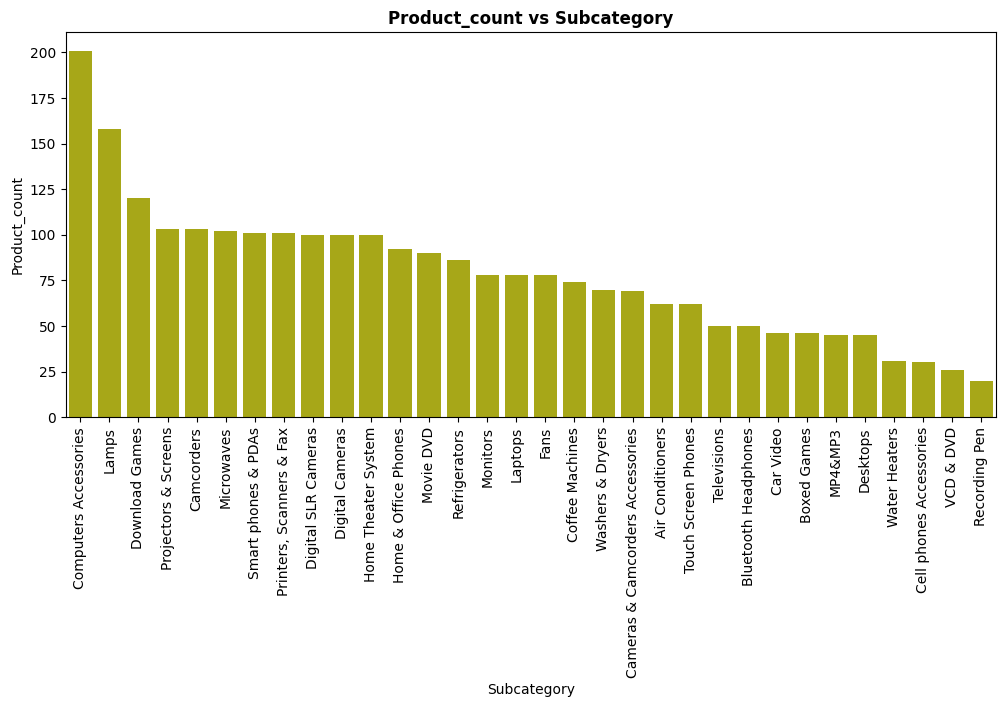

In [146]:
plt.figure(figsize=(12,5))
sns.barplot(x=pr['Subcategory'].value_counts().index, y=pr['Subcategory'].value_counts().values, color= "y")
plt.xlabel('Subcategory')
plt.ylabel('Product_count')
plt.title('Product_count vs Subcategory', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()

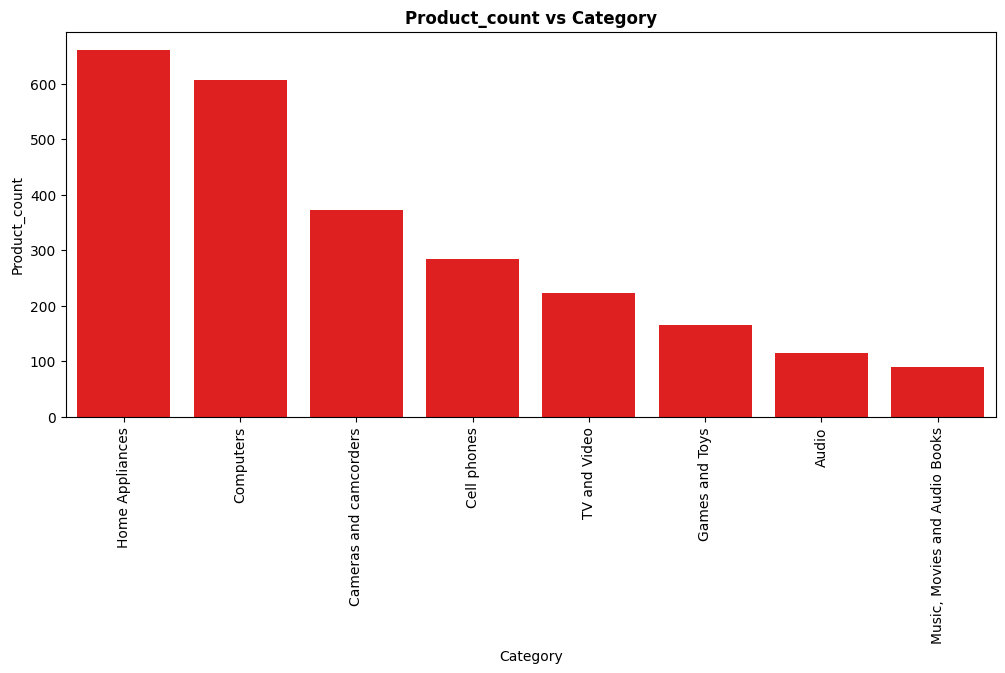

In [147]:
plt.figure(figsize=(12,5))
sns.barplot(x=pr['Category'].value_counts().index, y=pr['Category'].value_counts().values, color= "r")
plt.xlabel('Category')
plt.ylabel('Product_count')
plt.title('Product_count vs Category', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()

In [53]:
pr.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


## CUSTOMER SEGMENTATION

Assumptions:
1. Age bins= [2, 12, 20, 35, 50, 60, 95]

  Age labels= ["Kids", "Adolescents", "Youth", "Middle Age", "quinquagenarian", "Old Age"]
2.

In [54]:
# Firstly JOIN the different tables and drop the irrelevant columns.....
bss= pd.merge(cu,sa, how= "inner", on="CustomerKey")
bss= pd.merge(bss,pr, how= "inner", on="ProductKey")
bss

,CustomerKey,Gender,Name,City,State Code,State,Country,Continent,Birthday,Age,...,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,Australia,Australia,1939-07-03,81,...,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.00,104,Recording Pen,1,Audio
1,19082,Male,Matthew Denman,RANSOME,QLD,Queensland,Australia,Australia,1939-04-06,81,...,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.00,104,Recording Pen,1,Audio
2,37991,Male,Cooper Gillison,CARWELL,NSW,New South Wales,Australia,Australia,1937-01-06,83,...,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.00,104,Recording Pen,1,Audio
3,48733,Female,Sophia Gunther,BALCOLYN,NSW,New South Wales,Australia,Australia,1989-07-22,31,...,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.00,104,Recording Pen,1,Audio
4,51314,Female,Bianca Stobie,DUVERNEY,VIC,Victoria,Australia,Australia,1954-06-23,66,...,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.00,104,Recording Pen,1,Audio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,1950637,Male,Roger Pon,Santa Clara,CA,California,United States,North America,1986-12-21,34,...,USD,"Litware 16"" White Oscillating Stand Fan E701 W...",Litware,White,14.83,29.09,808,Fans,8,Home Appliances
62880,1976355,Male,Joel Mullaly,Boston,MA,Massachusetts,United States,North America,1990-03-03,30,...,USD,Litware 80mm LED Dual PCI Slot Fan E1501 Yellow,Litware,Yellow,15.80,30.99,808,Fans,8,Home Appliances
62881,2039796,Male,Cupido Portillo,Pittsburgh,PA,Pennsylvania,United States,North America,1949-08-14,71,...,USD,Contoso Home Theater System 4.1 Channel M1400 ...,Contoso,Silver,208.52,409.00,203,Home Theater System,2,TV and Video
62882,2040156,Male,Patrick Fabro,Wilkes Barre,PA,Pennsylvania,United States,North America,1987-11-28,33,...,USD,WWI Wall Lamp E315 Grey,Wide World Importers,Grey,52.00,101.99,806,Lamps,8,Home Appliances


In [55]:
bss_c= bss.copy()
bss_c= bss.drop(columns=["Name","Birthday","State Code","Line Item","CategoryKey","SubcategoryKey"])
bss_c.head()

,CustomerKey,Gender,City,State,Country,Continent,Age,Order Number,Order Date,Delivery Date,...,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,Subcategory,Category
0,301,Female,WANDEARAH EAST,South Australia,Australia,Australia,81,1776007,2019-11-11,2019-11-13,...,53,2,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.0,Recording Pen,Audio
1,19082,Male,RANSOME,Queensland,Australia,Australia,81,2061006,2020-08-22,2020-08-26,...,53,4,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.0,Recording Pen,Audio
2,37991,Male,CARWELL,New South Wales,Australia,Australia,83,1050006,2017-11-15,2017-11-19,...,53,5,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.0,Recording Pen,Audio
3,48733,Female,BALCOLYN,New South Wales,Australia,Australia,31,1340001,2018-09-01,2018-09-05,...,53,10,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.0,Recording Pen,Audio
4,51314,Female,DUVERNEY,Victoria,Australia,Australia,66,1513036,2019-02-21,2019-02-25,...,53,7,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.0,Recording Pen,Audio


In [56]:
bss_c.shape

(62884, 21)

In [57]:
bss_c.columns

Index(['CustomerKey', 'Gender', 'City', 'State', 'Country', 'Continent', 'Age',
       'Order Number', 'Order Date', 'Delivery Date', 'StoreKey', 'ProductKey',
       'Quantity', 'Currency Code', 'Product Name', 'Brand', 'Color',
       'Unit Cost USD', 'Unit Price USD', 'Subcategory', 'Category'],
      dtype='object')

In [79]:
# CK, Gender, Country, Continent, Age, Order number, order date, delivery date, PK, Quantity, Currency code, Brand, Color, Unit Cost, Unit Price, Subcategory, Category
# Revenue comparision of 2019 and 2020 wrt different factors.
df= bss_c[["CustomerKey","Gender","Country","Continent","Age","Order Date","ProductKey","Quantity","Currency Code","Unit Cost USD","Unit Price USD","Subcategory","Category"]]

In [80]:
df["Revenue"]=df["Unit Price USD"]*df["Quantity"]

<ipython-input-80-000241f6a8a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Revenue"]=df["Unit Price USD"]*df["Quantity"]


In [81]:
bins= [2, 12, 20, 35, 50, 60, 95]
labels= ["Kids", "Adolescents", "Youth", "Middle Age", "quinquagenarian", "Old Age"]

df["Age_group"]= pd.cut(df["Age"], bins= bins, labels= labels)
df.head()

<ipython-input-81-34c495f463b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age_group"]= pd.cut(df["Age"], bins= bins, labels= labels)


,CustomerKey,Gender,Country,Continent,Age,Order Date,ProductKey,Quantity,Currency Code,Unit Cost USD,Unit Price USD,Subcategory,Category,Revenue,Age_group
0,301,Female,Australia,Australia,81,2019-11-11,53,2,AUD,98.07,296.0,Recording Pen,Audio,592.0,Old Age
1,19082,Male,Australia,Australia,81,2020-08-22,53,4,AUD,98.07,296.0,Recording Pen,Audio,1184.0,Old Age
2,37991,Male,Australia,Australia,83,2017-11-15,53,5,AUD,98.07,296.0,Recording Pen,Audio,1480.0,Old Age
3,48733,Female,Australia,Australia,31,2018-09-01,53,10,AUD,98.07,296.0,Recording Pen,Audio,2960.0,Youth
4,51314,Female,Australia,Australia,66,2019-02-21,53,7,AUD,98.07,296.0,Recording Pen,Audio,2072.0,Old Age


In [99]:
df_19= df[df["Order Date"].dt.year==2019]
df_20= df[df["Order Date"].dt.year==2020]

Observation on Segmenting the Customer with refernce to Gender, Group-Age, Category, Country, Continent, Currency Code

1. Revenue in 2020 with reference to 2019 was almost droped by 50-55% for Various Age_Groups associated to both Male and Female. Even **Adolescents marked 80% decline** in revenue. Only **Camera and camrecorder sale is improved over the year for Adolescents** only.
2. Revenue in 2020 with reference to 2019 was almost droped by 45-55% for Various Category of product associated to both Male and Female. Even for **Home appliances the drop is larger than 60%**.
3. Revenue in 2020 with reference to 2019 was almost droped by 50% for Various Continents and Countries associated to both Male and Female.
4. While revenue in 2020 with reference to 2019 for **France is almost droped by 30%** which is lesser than overall 50% .
5.

In [97]:
pd.crosstab(columns= [df_19["Continent"],df_19["Country"]],index= df_19["Gender"], values=df_19["Revenue"], aggfunc=np.sum, margins=True)

Continent  Australia     Europe                                     \
Country    Australia     France     Germany      Italy Netherlands   
Gender                                                               
Female     411644.39  258951.64  1050062.86  333633.19   298963.92   
Male       478632.22  216038.89   824858.59  374202.89   340169.03   
All        890276.61  474990.53  1874921.45  707836.08   639132.95   

Continent                North America                        All  
Country   United Kingdom        Canada United States               
Gender                                                             
Female         992843.58     749562.83    4951762.10   9047424.51  
Male          1049086.93     752665.14    5181304.28   9216957.97  
All           2041930.51    1502227.97   10133066.38  18264382.48

In [98]:
pd.crosstab(columns= [df_20["Continent"],df_20["Country"]],index= df_20["Gender"], values=df_20["Revenue"], aggfunc=np.sum, margins=True)

Continent  Australia     Europe                                    \
Country    Australia     France    Germany      Italy Netherlands   
Gender                                                              
Female     218802.85  180643.54  413322.87  166018.75   173419.41   
Male       221853.70  144558.44  439687.88  141195.74   171107.26   
All        440656.55  325201.98  853010.75  307214.49   344526.67   

Continent                North America                       All  
Country   United Kingdom        Canada United States              
Gender                                                            
Female         423642.32     334432.93    2640719.06  4551001.73  
Male           582092.47     414892.95    2628241.97  4743630.41  
All           1005734.79     749325.88    5268961.03  9294632.14

In [104]:
pd.crosstab(columns= [df_19["Category"],df_19["Age_group"]],index= df_19["Gender"], values=df_19["Revenue"], aggfunc=np.sum, margins=True)

Category  Audio                                                               \
Age_group  Kids Adolescents      Youth Middle Age quinquagenarian    Old Age   
Gender                                                                         
Female      0.0    17988.90  102179.46  125287.05        69515.22  173588.03   
Male        0.0    19024.18  134345.47  121807.57        85342.96  215118.93   
All         NaN    37013.08  236524.93  247094.62       154858.18  388706.96   

Category  Cameras and camcorders                                    ...  \
Age_group                   Kids Adolescents      Youth Middle Age  ...   
Gender                                                              ...   
Female                       0.0    59718.83  245253.70  254378.46  ...   
Male                         0.0    35484.79  274318.04  219128.15  ...   
All                          NaN    95203.62  519571.74  473506.61  ...   

Category  Music, Movies and Audio Books                             \
Age_group                    Middle Age quinquagenarian    Old Age   
Gender                                                               
Female                        119485.86        65054.07  195257.34   
Male                           96651.88        77748.41  194048.26   
All                           216137.74       142802.48  389305.60   

Category  TV and Video                                                    \
Age_group         Kids Adolescents      Youth Middle Age quinquagenarian   
Gender                                                                     
Female             0.0    30408.42  212360.03  172803.43        98943.58   
Male               0.0    21827.70  176905.45  244910.65       122487.20   
All                NaN    52236.12  389265.48  417714.08       221430.78   

Category                      All  
Age_group    Old Age               
Gender                             
Female     300140.39   9047424.51  
Male       283981.63   9216957.97  
All        584122.02  18264382.48  

[3 rows x 49 columns]

In [101]:
pd.crosstab(columns= [df_20["Category"],df_20["Age_group"]],index= df_20["Gender"], values=df_20["Revenue"], aggfunc=np.sum, margins=True)

Category  Audio                                                               \
Age_group  Kids Adolescents      Youth Middle Age quinquagenarian    Old Age   
Gender                                                                         
Female      0.0     8349.35   54685.73   48741.82        48421.72   68616.80   
Male        0.0     6906.01   49139.18   37727.04        32632.25   97505.65   
All         NaN    15255.36  103824.91   86468.86        81053.97  166122.45   

Category  Cameras and camcorders                                    ...  \
Age_group                   Kids Adolescents      Youth Middle Age  ...   
Gender                                                              ...   
Female                       0.0    17797.69  120726.60  110618.67  ...   
Male                         0.0    36020.61  165343.41  112565.46  ...   
All                          NaN    53818.30  286070.01  223184.13  ...   

Category  Music, Movies and Audio Books                             \
Age_group                    Middle Age quinquagenarian    Old Age   
Gender                                                               
Female                         63331.47        36162.11   99357.74   
Male                           60347.89        38510.59  102188.13   
All                           123679.36        74672.70  201545.87   

Category  TV and Video                                                    \
Age_group         Kids Adolescents      Youth Middle Age quinquagenarian   
Gender                                                                     
Female             0.0     7079.32   99556.95  118691.63        48539.96   
Male               0.0     9829.09   88373.50  123609.36        48386.59   
All                NaN    16908.41  187930.45  242300.99        96926.55   

Category                     All  
Age_group    Old Age              
Gender                            
Female     152906.30  4551001.73  
Male       185893.31  4743630.41  
All        338799.61  9294632.14  

[3 rows x 49 columns]

In [107]:
pd.crosstab(columns= [df_19["Continent"],df_19["Country"]],index= df_19["Currency Code"], values=df_19["Revenue"], aggfunc=np.sum, margins=True)

Continent      Australia     Europe                                     \
Country        Australia     France     Germany      Italy Netherlands   
Currency Code                                                            
AUD            890276.61        NaN         NaN        NaN         NaN   
CAD                  NaN        NaN         NaN        NaN         NaN   
EUR                  NaN  474990.53  1874921.45  707836.08   639132.95   
GBP                  NaN        NaN         NaN        NaN         NaN   
USD                  NaN        NaN         NaN        NaN         NaN   
All            890276.61  474990.53  1874921.45  707836.08   639132.95   

Continent                    North America                        All  
Country       United Kingdom        Canada United States               
Currency Code                                                          
AUD                      NaN           NaN           NaN    890276.61  
CAD                      NaN    1502227.97           NaN   1502227.97  
EUR                      NaN           NaN           NaN   3696881.01  
GBP               2041930.51           NaN           NaN   2041930.51  
USD                      NaN           NaN   10133066.38  10133066.38  
All               2041930.51    1502227.97   10133066.38  18264382.48

In [106]:
pd.crosstab(columns= [df_20["Continent"],df_20["Country"]],index= df_20["Currency Code"], values=df_20["Revenue"], aggfunc=np.sum, margins=True)

Continent      Australia     Europe                                    \
Country        Australia     France    Germany      Italy Netherlands   
Currency Code                                                           
AUD            440656.55        NaN        NaN        NaN         NaN   
CAD                  NaN        NaN        NaN        NaN         NaN   
EUR                  NaN  325201.98  853010.75  307214.49   344526.67   
GBP                  NaN        NaN        NaN        NaN         NaN   
USD                  NaN        NaN        NaN        NaN         NaN   
All            440656.55  325201.98  853010.75  307214.49   344526.67   

Continent                    North America                       All  
Country       United Kingdom        Canada United States              
Currency Code                                                         
AUD                      NaN           NaN           NaN   440656.55  
CAD                      NaN     749325.88           NaN   749325.88  
EUR                      NaN           NaN           NaN  1829953.89  
GBP               1005734.79           NaN           NaN  1005734.79  
USD                      NaN           NaN    5268961.03  5268961.03  
All               1005734.79     749325.88    5268961.03  9294632.14

In [116]:
bss["Revenue"]=bss["Unit Price USD"]*bss["Quantity"]

In [117]:
df_2_19=bss[bss["Order Date"].dt.year==2019]
df_2_20=bss[bss["Order Date"].dt.year==2020]

In [118]:
pd.crosstab(columns= [df_2_19["Brand"]], index= df_2_19["Country"], values=df_2_19["Revenue"], aggfunc=np.sum, margins=True)

Brand,A. Datum,Adventure Works,Contoso,Fabrikam,Litware,Northwind Traders,Proseware,Southridge Video,Tailspin Toys,The Phone Company,Wide World Importers,All
Country,,,,,,,,,,,,
Australia,35177.2,167732.14,175318.60,129459.60,40101.48,12582.69,53477.37,36149.36,12398.15,81725.0,146155.02,890276.61
Canada,40773.4,290313.41,255007.35,173360.86,61589.99,39063.61,117753.26,77108.28,18416.31,150856.0,277985.50,1502227.97
France,10112.7,101541.30,96424.16,51654.23,8086.08,4125.80,47117.90,16306.96,9192.87,46021.0,84407.53,474990.53
Germany,40922.2,427828.47,296431.93,209825.59,45057.05,37172.02,154529.67,78377.67,29346.50,201500.0,353930.35,1874921.45
Italy,24117.6,173966.90,149843.18,90246.04,10150.43,15728.10,45458.65,20175.42,14664.59,75555.0,87930.17,707836.08
Netherlands,14902.5,153994.70,102523.82,72294.38,14413.25,8310.91,48525.93,29299.31,12171.55,65231.0,117465.60,639132.95
United Kingdom,67409.0,460369.67,357256.41,194693.15,68347.71,51091.20,80084.88,119502.79,31019.67,222671.0,389485.03,2041930.51
United States,318978.4,2135502.91,1788454.00,1156440.36,413400.94,205753.74,576245.55,427635.82,151777.33,1177355.0,1781522.33,10133066.38
All,552393.0,3911249.50,3221259.45,2077974.21,661146.93,373828.07,1123193.21,804555.61,278986.97,2020914.0,3238881.53,18264382.48


In [119]:
pd.crosstab(columns= [df_2_20["Brand"]], index= df_2_20["Country"], values=df_2_20["Revenue"], aggfunc=np.sum, margins=True)

Brand,A. Datum,Adventure Works,Contoso,Fabrikam,Litware,Northwind Traders,Proseware,Southridge Video,Tailspin Toys,The Phone Company,Wide World Importers,All
Country,,,,,,,,,,,,
Australia,7895.2,132875.97,50020.34,66494.94,14022.89,4278.49,40682.40,21726.62,4447.62,43514.0,54698.08,440656.55
Canada,21575.2,161935.07,148910.81,60128.67,44687.78,4423.87,70460.93,34738.06,12842.11,80415.0,109208.38,749325.88
France,9339.0,80351.90,51346.64,49466.69,8755.96,624.75,24864.90,18769.61,3933.32,31745.0,46004.21,325201.98
Germany,23318.1,164008.80,147798.18,65961.52,16858.77,7816.79,88170.95,36975.82,9441.34,96406.0,196254.48,853010.75
Italy,5180.7,91685.36,48784.83,21555.38,799.96,1855.06,12541.86,14246.60,7690.54,40237.0,62637.20,307214.49
Netherlands,11476.4,79880.98,66102.84,33704.49,9001.80,1491.94,21930.85,15233.97,4238.57,40373.0,61091.83,344526.67
United Kingdom,30843.5,218843.50,161532.37,107692.46,29636.71,36755.52,76858.22,44378.04,15385.31,121004.0,162805.16,1005734.79
United States,149835.5,1006493.49,873023.98,756404.53,133465.12,64616.73,341342.13,277604.49,86198.28,634458.0,945518.78,5268961.03
All,259463.6,1936075.07,1547519.99,1161408.68,257228.99,121863.15,676852.24,463673.21,144177.09,1088152.0,1638218.12,9294632.14


In [121]:
pd.crosstab(columns= [df_2_19["Color"]], index= df_2_19["Country"], values=df_2_19["Revenue"], aggfunc=np.sum, margins=True)

Color,Azure,Black,Blue,Brown,Gold,Green,Grey,Orange,Pink,Purple,Red,Silver,Silver Grey,Transparent,White,Yellow,All
Country,,,,,,,,,,,,,,,,,
Australia,1696.5,219124.38,36441.26,83246.45,26918.35,34570.70,49125.79,49026.74,17052.06,1409.85,43113.54,165636.81,2021.0,11.76,156792.94,4088.48,890276.61
Canada,3258.5,410211.94,72797.63,80883.93,45567.61,57176.05,123448.66,18177.54,30986.13,4656.54,35178.92,226991.16,NaN,26.46,384999.39,7867.51,1502227.97
France,1314.0,132007.59,21967.32,40652.17,13275.44,8806.86,30964.55,6195.66,11245.60,627.94,13021.65,110027.45,NaN,NaN,83346.35,1537.95,474990.53
Germany,4554.4,515763.12,79678.02,119807.57,50095.89,26881.10,123388.97,54182.46,34538.81,4324.71,85676.38,326026.34,10602.0,49.98,430092.86,9258.84,1874921.45
Italy,2014.0,178161.96,55759.68,39673.37,21727.95,32598.17,50612.10,6415.73,16466.67,861.95,24347.21,120489.11,6326.0,29.40,151567.04,785.74,707836.08
Netherlands,1923.0,190019.02,28792.99,35381.46,23767.06,5799.99,50233.41,17863.39,8235.84,1943.33,16785.70,83669.91,3924.0,17.64,161822.47,8953.74,639132.95
United Kingdom,5753.0,558502.31,109962.60,143608.77,59857.84,82007.19,164316.21,30449.94,48363.58,2627.95,65746.26,342058.63,16372.8,26.46,406822.80,5454.17,2041930.51
United States,27571.6,2571522.21,535697.29,664737.19,312796.11,288321.22,711406.69,173189.53,199693.04,14301.65,294094.66,1873744.27,50345.2,123.48,2363692.60,51829.64,10133066.38
All,48085.0,4775312.53,941096.79,1207990.91,554006.25,536161.28,1303496.38,355500.99,366581.73,30753.92,577964.32,3248643.68,89591.0,285.18,4139136.45,89776.07,18264382.48


In [120]:
pd.crosstab(columns= [df_2_20["Color"]], index= df_2_20["Country"], values=df_2_20["Revenue"], aggfunc=np.sum, margins=True)

Color,Azure,Black,Blue,Brown,Gold,Green,Grey,Orange,Pink,Purple,Red,Silver,Silver Grey,Transparent,White,Yellow,All
Country,,,,,,,,,,,,,,,,,
Australia,268.0,137588.12,17973.78,40334.26,16757.20,4595.98,32844.12,2566.99,3468.41,2418.91,9175.60,64053.51,312.0,14.70,95957.40,12327.57,440656.55
Canada,852.0,166379.49,26766.91,55071.55,21136.95,36936.87,81449.27,7778.99,18169.88,1884.95,11493.86,136721.99,4191.0,2.94,171936.64,8552.59,749325.88
France,NaN,84894.73,12434.22,23492.60,10851.93,7656.19,20304.69,10806.37,3150.00,181.00,19436.60,73948.12,1352.0,NaN,54216.36,2477.17,325201.98
Germany,1077.6,254859.20,40137.67,27301.82,23854.66,32934.27,81413.71,10347.96,7337.27,3665.89,18136.40,165898.45,4410.0,11.76,176076.64,5547.45,853010.75
Italy,NaN,86059.02,12312.64,29386.10,11921.00,9601.50,15750.89,3811.00,2179.72,196.00,3299.91,61163.97,5155.4,NaN,66044.27,333.07,307214.49
Netherlands,686.0,95148.39,30408.03,32839.85,11953.99,15643.40,24658.17,2046.09,4582.12,499.95,8892.13,43443.30,NaN,NaN,70171.74,3553.51,344526.67
United Kingdom,1183.0,269819.27,49045.26,68059.09,37700.90,13799.33,80350.91,24135.79,16809.11,1849.97,39369.27,183054.70,3786.8,17.64,211172.70,5581.05,1005734.79
United States,12453.2,1447831.21,300453.28,307117.18,172592.55,124120.57,478702.31,95443.90,117407.43,8171.42,129205.89,913846.93,31779.8,58.80,1100652.37,29124.19,5268961.03
All,16519.8,2542579.43,489531.79,583602.45,306769.18,245288.11,815474.07,156937.09,173103.94,18868.09,239009.66,1642130.97,50987.0,105.84,1946228.12,67496.60,9294632.14


Recommendations:
1. A huge decline is observed when we relate 2020 sale to 2019 sale and it is also conclude that the drop is irrespective of the Region, Country, Age, Gender, Brand, Color, Currency, Subcategory and Category.
2. Only France observed 30% drop against the 50-60% drop across the world.
3. USD and GBP are the currency used for the major transactions and observe almost 60% drop in these currency transactions.
4. Cost price of the product is constant throughout the analysis i.e. from 2016 to 2021 the cost price is same.
5. Possible reason could be-

  a. Ramp down of the platform used for the purchasing activity.

  b. Some controversial actions or the bankruptcy of the Company.

  c. USD and GBP major contribution in revenue.

  d. Some kind of regulation or tax implementation on the company which leads to the poor management or operational lag.

  e. The constant cost price of the items could be the reason of poor quality leads to drop in sales.

In [139]:
# Any random unit cost of the product
df[df["ProductKey"]==50]["Unit Cost USD"].value_counts()

Unit Cost USD
91.95    98
Name: count, dtype: int64

In [141]:
df["Order Date"].min(), df["Order Date"].max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2021-02-20 00:00:00'))

In [143]:
df_19["Quantity"].sum(), df_20["Quantity"].sum()

(68440, 34463)

In [140]:
df

,CustomerKey,Gender,Country,Continent,Age,Order Date,ProductKey,Quantity,Currency Code,Unit Cost USD,Unit Price USD,Subcategory,Category,Revenue,Age_group,Cost Price
0,301,Female,Australia,Australia,81,2019-11-11,53,2,AUD,98.07,296.00,Recording Pen,Audio,592.00,Old Age,196.14
1,19082,Male,Australia,Australia,81,2020-08-22,53,4,AUD,98.07,296.00,Recording Pen,Audio,1184.00,Old Age,392.28
2,37991,Male,Australia,Australia,83,2017-11-15,53,5,AUD,98.07,296.00,Recording Pen,Audio,1480.00,Old Age,490.35
3,48733,Female,Australia,Australia,31,2018-09-01,53,10,AUD,98.07,296.00,Recording Pen,Audio,2960.00,Youth,980.70
4,51314,Female,Australia,Australia,66,2019-02-21,53,7,AUD,98.07,296.00,Recording Pen,Audio,2072.00,Old Age,686.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,1950637,Male,United States,North America,34,2019-12-30,2431,1,USD,14.83,29.09,Fans,Home Appliances,29.09,Youth,14.83
62880,1976355,Male,United States,North America,30,2016-01-13,2467,3,USD,15.80,30.99,Fans,Home Appliances,92.97,Youth,47.40
62881,2039796,Male,United States,North America,71,2019-10-24,256,5,USD,208.52,409.00,Home Theater System,TV and Video,2045.00,Old Age,1042.60
62882,2040156,Male,United States,North America,33,2017-11-04,2259,4,USD,52.00,101.99,Lamps,Home Appliances,407.96,Youth,208.00
